In [1]:
from pyopenms import *
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
def minutes_to_secs(input):
    output = input.split("m")
    output[1] = output[1].replace("s", "")
    return float(output[0]) * 60 + float(output[1])
   
def read_time(file_path, different_tools):
    out = np.zeros(different_tools)
    count = np.zeros(different_tools)
    with open(file_path, 'r') as file:
        tool = 0
        
        while content := file.readline():
            content.strip()
            if (content[0:4] == "real"):
                out[tool] += minutes_to_secs(content[4:])
                count[tool] += 1
                tool += 1
                if tool >= different_tools:
                    tool = 0
          
    for i in range(len(out)):
        out[i] = out[i]/count[i]
    return out

In [11]:
def read_time2(file_path):
    tools = []
    df = pd.DataFrame({"tol" : [], "depth":[], "window":[], "time":[]})
    with open(file_path, 'r') as file:
        entry = False
        while content := file.readline():
            if content[0] == ">":
                s_content = content.strip().split(",")
                t = float(s_content[2])
                ds= int(s_content[0][1])
                db= float(s_content[1])
                entry = True
            if entry and content[0:4] == "real":
                time = minutes_to_secs(content.strip()[4:])
                add_df = pd.DataFrame({"tol" : [t], "depth":[ds], "window":[db], "time":[time]})
                df = pd.concat([df, add_df])
                entry = False
    return df
                
                

In [12]:
df = read_time2("MDFIID_time_measurement.txt")

In [13]:
df


,tol,depth,window,time
0,0.025,1.0,0.0,9.637
0,0.050,1.0,0.0,10.046
0,0.075,1.0,0.0,10.570
0,0.100,1.0,0.0,10.681
0,0.125,1.0,0.0,10.448
...,...,...,...,...
0,0.100,3.0,500.0,13.415
0,0.125,3.0,500.0,13.694
0,0.150,3.0,500.0,13.906
0,0.175,3.0,500.0,13.723


In [24]:
df_area = df[(df["tol"]==0.200)|(df["tol"]==0.025)]

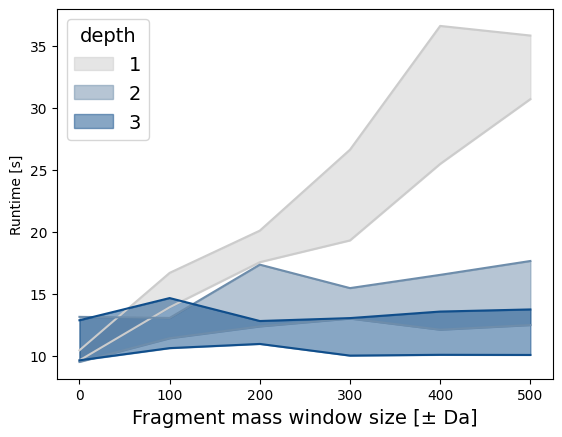

In [44]:
color_map = {1.0: "#CCCCCC", 2.0:"#6E8DAB", 3.0:"#104E8B"}
for d in df_area["depth"].unique():
    df_t = df_area[df_area["depth"]==d]
    df_min=df_t[df_t["tol"] == 0.025]
    plt.plot(df_min["window"], df_min["time"], color = color_map[d])
    df_max=df_t[df_t["tol"] == 0.200]
    plt.plot(df_max["window"], df_max["time"], color = color_map[d])
    plt.fill_between(df_min["window"], df_min["time"], df_max["time"], color = color_map[d], alpha = 0.5, label = int(d))
    plt.xlabel('Fragment mass window size [\u00B1 Da]', size = 14)
    plt.ylabel('Runtime [s]')
    plt.legend(title = "depth", title_fontsize = 14, fontsize = 14)
    plt.savefig("MDFIID_runtime-png", bbox_inches = 'tight', dpi = 500)